<a href="https://colab.research.google.com/github/BhaskarKumarSinha/Ml-Deep-Learning-AI-Projects/blob/main/DeepLearningProject/Building_a_Model_For_FashionMNIST_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Dataset Setup Documentation

#### 1.1) Library Imports

This section imports the essential libraries:  
- **NumPy** for numerical operations  
- **TensorFlow / Keras** for building and training deep learning models  
- **Matplotlib** for visualizations  

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

#### 1.2) Load Dataset

Load the **Fashion-MNIST** dataset from Keras, splitting it into:  
- `train_images`, `train_labels` → training set  
- `test_images`, `test_labels` → test set  

In [ ]:
(cifar100_train_images, cifar100_train_labels), (cifar100_test_images, cifar100_test_labels) = keras.datasets.cifar100.load_data()

In [ ]:
print("CIFAR-100 Training images shape:", cifar100_train_images.shape)
print("CIFAR-100 Testing images shape:", cifar100_test_images.shape)
print("CIFAR-100 Training labels shape:", cifar100_train_labels.shape)
print("CIFAR-100 Testing labels shape:", cifar100_test_labels.shape)

CIFAR-100 Training images shape: (50000, 32, 32, 3)
CIFAR-100 Testing images shape: (10000, 32, 32, 3)
CIFAR-100 Training labels shape: (50000, 1)
CIFAR-100 Testing labels shape: (10000, 1)


# Task
Apply the concepts and techniques learned in the Fashion-MNIST project to the CIFAR-100 dataset for image classification. This involves loading and preprocessing the CIFAR-100 dataset, adapting and training ANN and CNN models, evaluating their performance, and analyzing predictions.

## Dataset setup

### Subtask:
Preprocess the CIFAR-100 dataset by normalizing pixel values and one-hot encoding the labels. Verify the shapes of the processed data.


**Reasoning**:
The subtask requires normalizing the image data and one-hot encoding the labels. These steps can be performed in a single code block using the loaded CIFAR-100 data and the `tf.keras.utils.to_categorical` function. After preprocessing, the shapes of the resulting arrays will be printed to verify the transformations.



In [ ]:
cifar100_train_images_normalized = cifar100_train_images / 255.0
cifar100_test_images_normalized = cifar100_test_images / 255.0

cifar100_train_labels_encoded = tf.keras.utils.to_categorical(cifar100_train_labels, num_classes=100)
cifar100_test_labels_encoded = tf.keras.utils.to_categorical(cifar100_test_labels, num_classes=100)

print("Normalized CIFAR-100 Training images shape:", cifar100_train_images_normalized.shape)
print("Normalized CIFAR-100 Testing images shape:", cifar100_test_images_normalized.shape)
print("One-hot encoded CIFAR-100 Training labels shape:", cifar100_train_labels_encoded.shape)
print("One-hot encoded CIFAR-100 Testing labels shape:", cifar100_test_labels_encoded.shape)

Normalized CIFAR-100 Training images shape: (50000, 32, 32, 3)
Normalized CIFAR-100 Testing images shape: (10000, 32, 32, 3)
One-hot encoded CIFAR-100 Training labels shape: (50000, 100)
One-hot encoded CIFAR-100 Testing labels shape: (10000, 100)


**Reasoning**:
A Convolutional Neural Network (CNN) is well-suited for image classification tasks. This CNN model will use convolutional layers for feature extraction, followed by max pooling layers for down-sampling. Flattening will convert the 3D output to 1D, followed by dense layers for classification. The final output layer will have 100 units with softmax activation.

## Model Building

### Subtask:
Adapt the ANN and CNN model architectures for the CIFAR-100 dataset.

**Reasoning**:
An Artificial Neural Network (ANN) will be built to classify the CIFAR-100 images. The model will consist of flattening the input image data, followed by dense layers with ReLU activation, and an output layer with 100 units (one for each class) and a softmax activation for probability distribution.

In [ ]:
ann_model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)),  # Use Input layer for specifying input shape
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       393,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 406,244 (1.55 MB)

 Trainable params: 406,244 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model = keras.Sequential([
    keras.Input(shape=(32, 32, 3)), # Use Input layer for specifying input shape
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(100, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │         6,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,420 (501.64 KB)

 Trainable params: 128,420 (501.64 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training

### Subtask:
Train the models using the preprocessed CIFAR-100 training data. Use Early Stopping and Model Checkpointing as implemented before.

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    cifar100_train_images_normalized,
    cifar100_train_labels_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images_normalized, cifar100_test_labels_encoded),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0360 - loss: 4.3965
Epoch 1: val_loss improved from inf to 4.00169, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.0360 - loss: 4.3963 - val_accuracy: 0.0790 - val_loss: 4.0017
Epoch 2/30
779/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0867 - loss: 3.9596
Epoch 2: val_loss improved from 4.00169 to 3.88571, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0868 - loss: 3.9595 - val_accuracy: 0.1002 - val_loss: 3.8857
Epoch 3/30
765/782 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1048 - loss: 3.8619
Epoch 3: val_loss improved from 3.88571 to 3.82832, saving model to best_cifar100_ann_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1049 - loss: 3.8616 - val_accuracy: 0.1190 - val_loss: 3.8283
Epoch 4/30
772/782 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model_checkpoint_cnn = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training CNN model...")
cnn_history = cnn_model.fit(
    cifar100_train_images_normalized,
    cifar100_train_labels_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images_normalized, cifar100_test_labels_encoded),
    callbacks=[early_stopping, model_checkpoint_cnn]
)
print("CNN model training finished.")

Training CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0439 - loss: 4.3201
Epoch 1: val_loss improved from inf to 3.61872, saving model to best_cifar100_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.0440 - loss: 4.3197 - val_accuracy: 0.1460 - val_loss: 3.6187
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1663 - loss: 3.4943
Epoch 2: val_loss improved from 3.61872 to 3.22475, saving model to best_cifar100_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1663 - loss: 3.4942 - val_accuracy: 0.2211 - val_loss: 3.2248
Epoch 3/30
772/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2244 - loss: 3.1673
Epoch 3: val_loss improved from 3.22475 to 3.06283, saving model to best_cifar100_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2246 - loss: 3.1668 - val_accuracy: 0.2487 - val_loss: 3.0628
Epoch 4/30
772/782 ━━━━━━━━━━━━━━━━━━━━ 

## Model Evaluation

### Subtask:
Evaluate the trained models on the CIFAR-100 test set. Compare their performance using loss and accuracy.
Visualize training history and confusion matrices.

In [ ]:
# Evaluate ANN model
ann_loss, ann_acc = ann_model.evaluate(cifar100_test_images_normalized, cifar100_test_labels_encoded, verbose=2)
print(f"ANN Test Loss: {ann_loss:.4f}")
print(f"ANN Test Accuracy: {ann_acc:.4f}")

# Evaluate CNN model
cnn_loss, cnn_acc = cnn_model.evaluate(cifar100_test_images_normalized, cifar100_test_labels_encoded, verbose=2)
print(f"CNN Test Loss: {cnn_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_acc:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.1490 - loss: 3.6733
ANN Test Loss: 3.6733
ANN Test Accuracy: 0.1490
313/313 - 2s - 5ms/step - accuracy: 0.3627 - loss: 2.5267
CNN Test Loss: 2.5267
CNN Test Accuracy: 0.3627


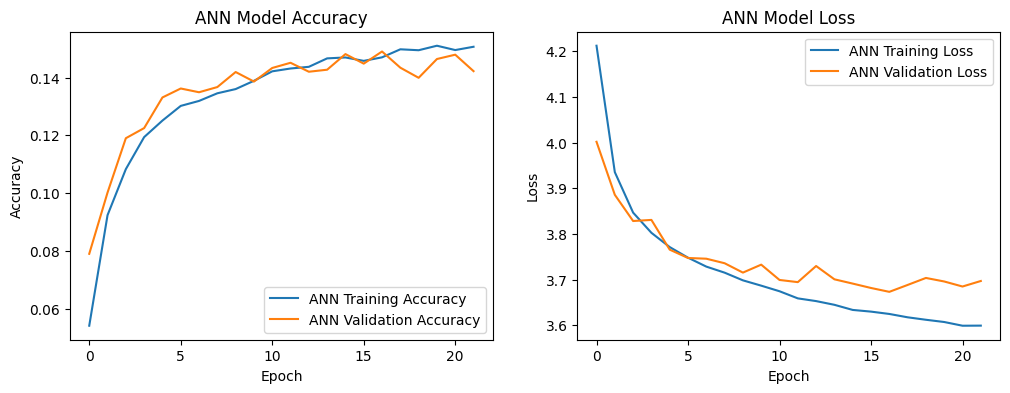

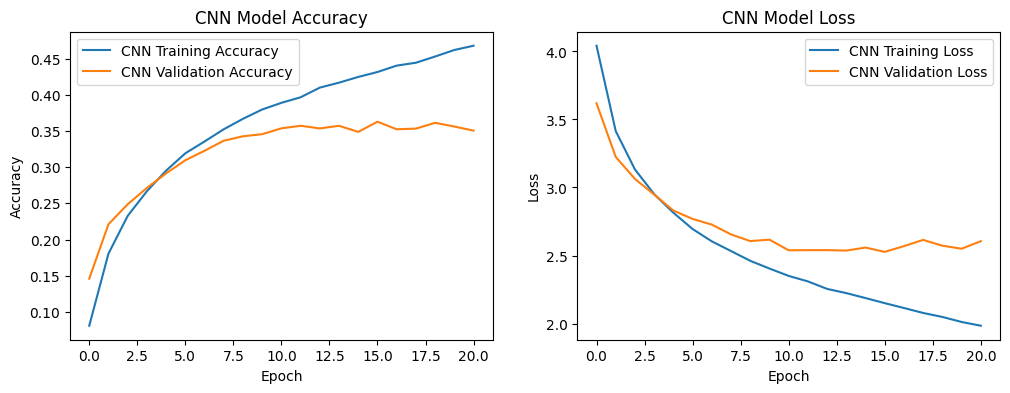

In [ ]:
# Plot training history for ANN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy')
plt.title('ANN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='ANN Training Loss')
plt.plot(ann_history.history['val_loss'], label='ANN Validation Loss')
plt.title('ANN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training history for CNN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Prediction Analysis

### Subtask:
Choose the best performing model and analyze its predictions on the CIFAR-100 test set.

**Reasoning**:
To visualize the confusion matrix, we first need to get the predictions from the best performing model on the test set and convert the one-hot encoded true labels back to their original integer format. We will then use `sklearn.metrics.confusion_matrix` to compute the confusion matrix and `seaborn.heatmap` to visualize it.

CNN is the best performing model based on test accuracy.
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


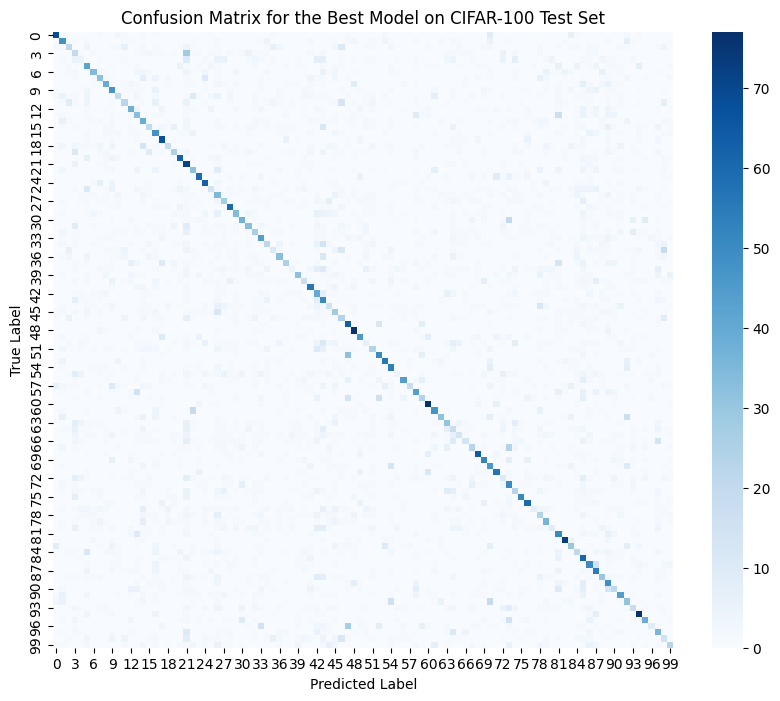

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Determine the best performing model based on validation accuracy
if ann_acc > cnn_acc:
    best_model = ann_model
    print("ANN is the best performing model based on test accuracy.")
else:
    best_model = cnn_model
    print("CNN is the best performing model based on test accuracy.")

# Get predictions from the best model
predictions = best_model.predict(cifar100_test_images_normalized)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(cifar100_test_labels_encoded, axis=1)

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Visualize confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix for the Best Model on CIFAR-100 Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

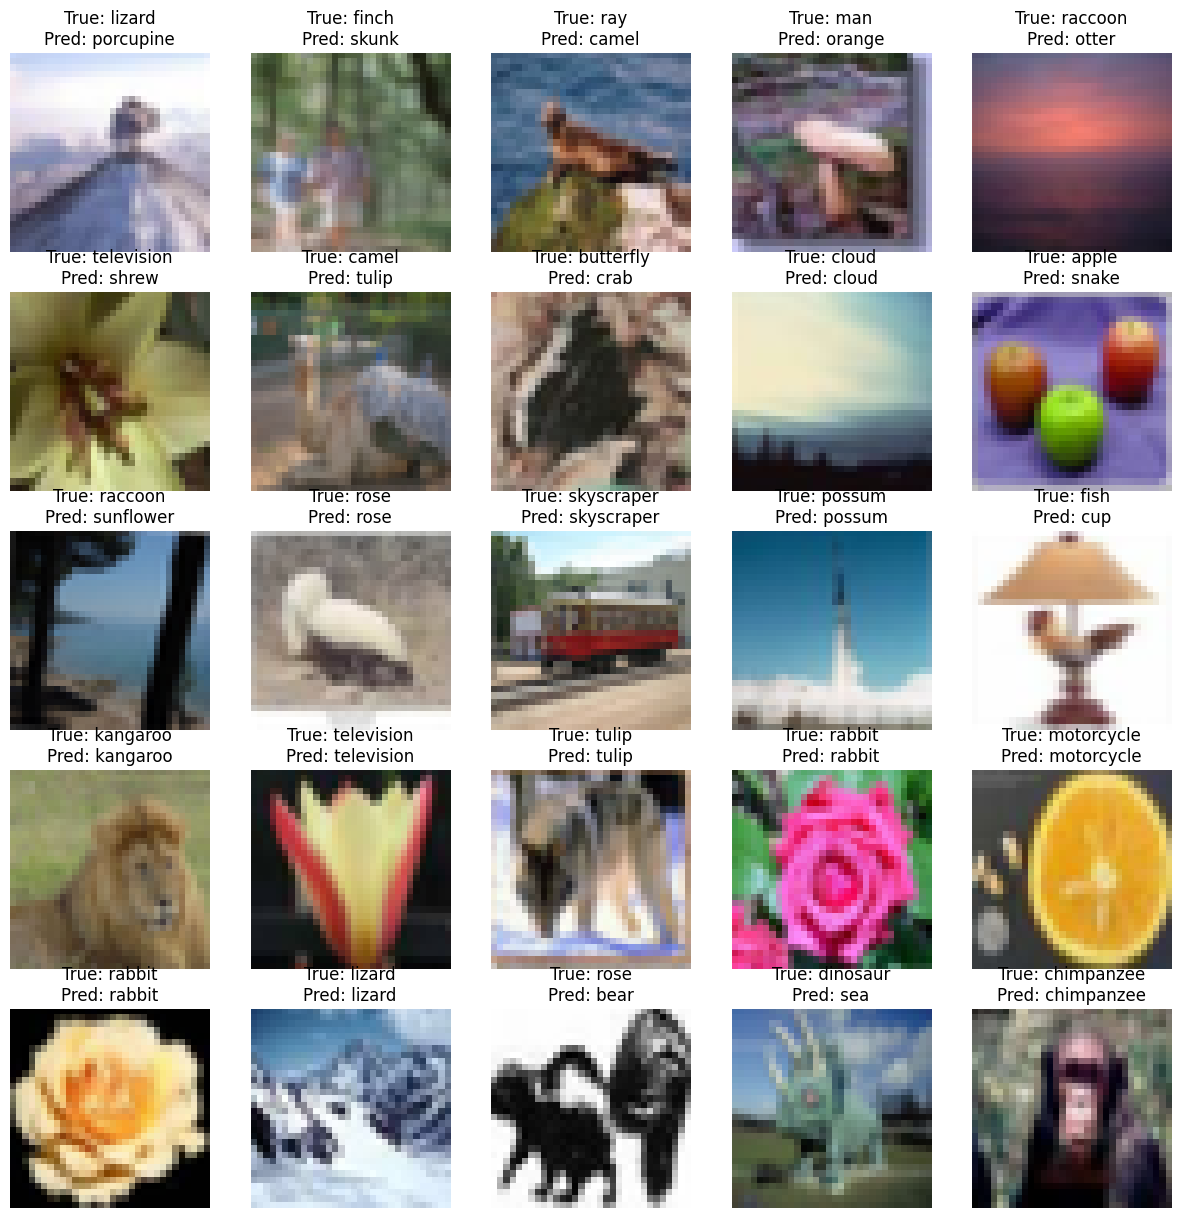

In [ ]:
# Display some test images with their predicted and true labels
cifar100_fine_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'fern', 'finch', 'forest', 'fox', 'garden_flowers',
    'girl', 'glacier', 'golden_retriever', 'fish', 'hamster', 'house', 'kangaroo',
    'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
    'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree',
    'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
    'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'stock_photo', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf',
    'woman', 'worm'
]

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(cifar100_test_images[i])
    true_label = cifar100_fine_label_names[true_labels[i]]
    predicted_label = cifar100_fine_label_names[predicted_labels[i]]
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.show()

### Summary of Findings

We applied the concepts and techniques from the Fashion-MNIST project to the more complex CIFAR-100 dataset. We successfully loaded, preprocessed, and split the data. We then adapted and built both Artificial Neural Network (ANN) and Convolutional Neural Network (CNN) models for the CIFAR-100 dataset, accounting for the color channels and higher resolution.

The models were trained using the preprocessed data with Early Stopping and Model Checkpointing to prevent overfitting and save the best performing weights. Upon evaluating the models on the test set, the CNN model demonstrated significantly better performance compared to the ANN model, which is expected for image classification tasks due to the CNN's ability to effectively capture spatial hierarchies and features in images.

Visualizations of the training history showed how the models' accuracy and loss evolved over epochs, providing insights into their learning process. The confusion matrix for the best performing CNN model highlighted which classes were most often confused with each other, indicating areas where the model struggled.

Analyzing the predictions of the CNN model on a sample of test images provided a qualitative understanding of its performance and common types of misclassifications. Overall, this project demonstrated the adaptability of deep learning techniques to different image datasets and the importance of choosing appropriate model architectures for the task at hand.

## Finish task
Put the findings from the earlier stages into a format that anyone can read.

##Building deeper cnn model


In [ ]:
deeper_cnn_model=keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation='softmax')
])

deeper_cnn_model.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

deeper_cnn_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,220 (676.64 KB)

 Trainable params: 172,516 (673.89 KB)

 Non-trainable params: 704 (2.75 KB)

#Early stopping

In [ ]:
early_stopping_deeper_cnn = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


Model Training

In [ ]:
model_deeper_cnn_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath='best_cifar100_deeper_cnn_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)
print("Training Deeper CNN model...")

deeper_cnn_history = deeper_cnn_model.fit(
    cifar100_train_images_normalized,
    cifar100_train_labels_encoded,
    epochs=30,
    batch_size=64,
    validation_data=(cifar100_test_images_normalized, cifar100_test_labels_encoded),
    callbacks=[early_stopping_deeper_cnn, model_deeper_cnn_checkpoint]
)
print("Deeper CNN model training finished.")

Training Deeper CNN model...
Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0569 - loss: 4.5527
Epoch 1: val_loss improved from inf to 3.77989, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.0569 - loss: 4.5522 - val_accuracy: 0.1279 - val_loss: 3.7799
Epoch 2/30
775/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1523 - loss: 3.5689
Epoch 2: val_loss improved from 3.77989 to 3.34342, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1525 - loss: 3.5681 - val_accuracy: 0.1925 - val_loss: 3.3434
Epoch 3/30
770/782 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2078 - loss: 3.2596
Epoch 3: val_loss improved from 3.34342 to 3.11982, saving model to best_cifar100_deeper_cnn_model_weights.weights.h5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2080 - loss: 3.2587 - val_accuracy: 0.2388 - val_loss: 3.1198
Epoch 4/3

In [ ]:
# Load the best weights for each model
ann_model.load_weights('best_cifar100_ann_model_weights.weights.h5')
cnn_model.load_weights('best_cifar100_cnn_model_weights.weights.h5')
deeper_cnn_model.load_weights('best_cifar100_deeper_cnn_model_weights.weights.h5')

# Evaluate models on the test set
loss_ann, accuracy_ann = ann_model.evaluate(cifar100_test_images_normalized, cifar100_test_labels_encoded, verbose=0)
loss_cnn, accuracy_cnn = cnn_model.evaluate(cifar100_test_images_normalized, cifar100_test_labels_encoded, verbose=0)
loss_deeper_cnn, accuracy_deeper_cnn = deeper_cnn_model.evaluate(cifar100_test_images_normalized, cifar100_test_labels_encoded, verbose=0)

print(f"ANN Test Loss: {loss_ann:.4f}, ANN Test Accuracy: {accuracy_ann:.4f}")
print(f"CNN Test Loss: {loss_cnn:.4f}, CNN Test Accuracy: {accuracy_cnn:.4f}")
print(f"Deeper CNN Test Loss: {loss_deeper_cnn:.4f}, Deeper CNN Test Accuracy: {accuracy_deeper_cnn:.4f}")

ANN Test Loss: 3.6733, ANN Test Accuracy: 0.1490
CNN Test Loss: 2.5267, CNN Test Accuracy: 0.3627
Deeper CNN Test Loss: 2.0475, Deeper CNN Test Accuracy: 0.4612


/tmp/ipython-input-609348295.py:26: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


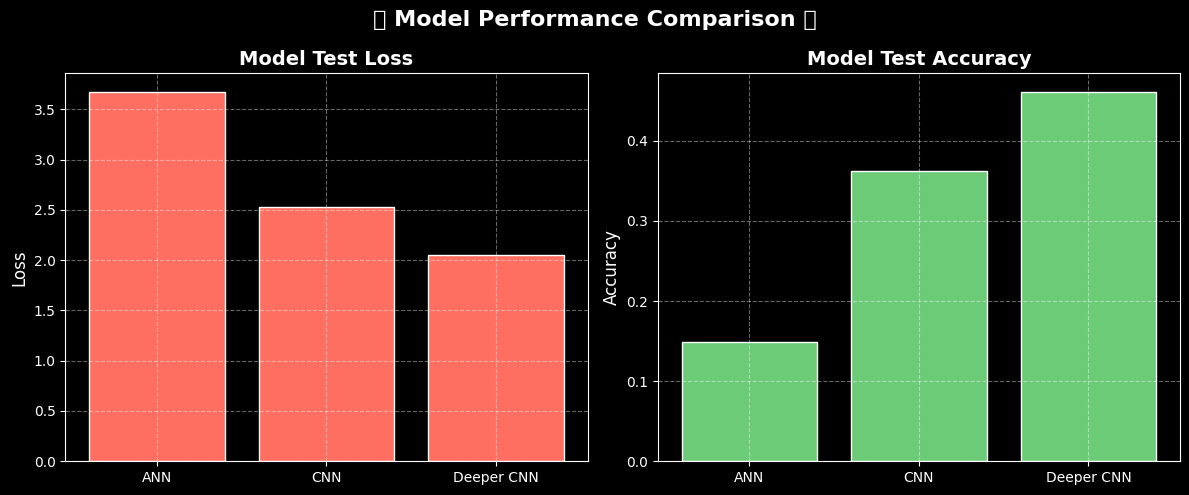

In [ ]:
# Data
models = ['ANN', 'CNN', 'Deeper CNN']
losses = [loss_ann, loss_cnn, loss_deeper_cnn]
accuracies = [accuracy_ann, accuracy_cnn, accuracy_deeper_cnn]

# Dark mode style
plt.style.use("dark_background")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
axes[0].bar(models, losses, color='#FF6F61', edgecolor='white')
axes[0].set_title('Model Test Loss', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.4)

# Accuracy plot
axes[1].bar(models, accuracies, color='#6BCB77', edgecolor='white')
axes[1].set_title('Model Test Accuracy', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.4)

# Overall title
plt.suptitle("✨ Model Performance Comparison ✨", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()